# Portafolios de Inversión
## Tarea 4
José Armando Melchor Soto

---
### Librerías 



In [87]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize 

---

### Activos

- **LLY (Eli Lilly)**
- **NVDA (NVIDIA)**
- **MSFT (Microsoft)** 
- **KXI (iShares Global Consumer Staples ETF)**


---

### Investigación de las Emisoras

Realiza un breve resumen de los activos, describiendo su giro de negocio, sector y productos o servicios.


- **LLY (Eli Lilly)**:
    - a
- **NVDA (NVIDIA)**:
    - a
- **MSFT (Microsoft)**: 
    - a
- **KXI (iShares Global Consumer Staples ETF)**:
    - a


---

### Importación de Datos

In [88]:
prices = yf.download(['LLY','NVDA','MSFT','KXI'],start= '2018-01-01' , end = '2024-09-25')['Close']
prices.head()

[*********************100%***********************]  4 of 4 completed


Ticker,KXI,LLY,MSFT,NVDA
Date,,,,
2018-01-02,44.372314,75.427597,79.328529,4.929085
2018-01-03,44.376518,75.837357,79.697701,5.253488
2018-01-04,44.473259,76.175835,80.399170,5.281181
2018-01-05,44.759254,77.111099,81.395958,5.325935
2018-01-08,44.742428,76.719193,81.479019,5.489125


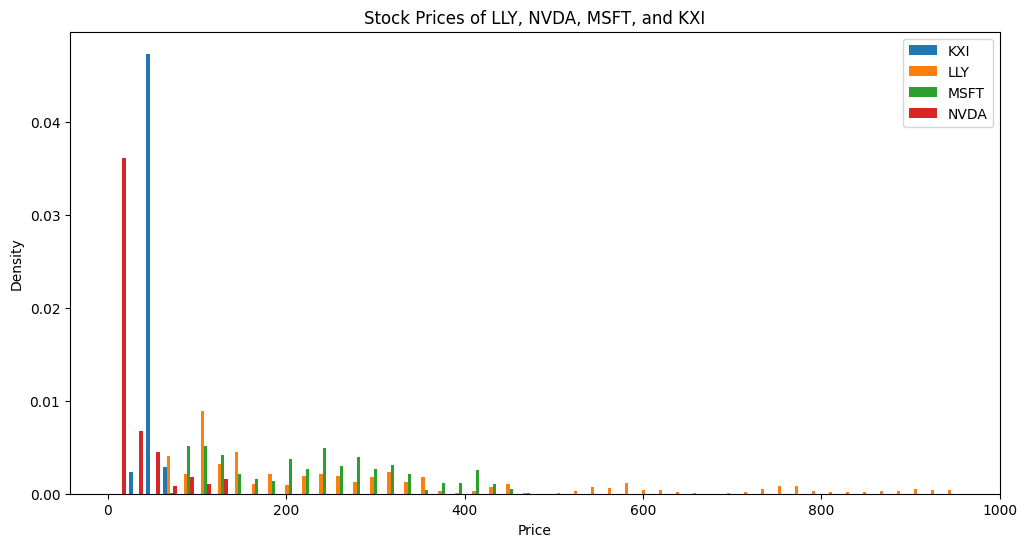

In [89]:
plt.figure(figsize=(12, 6))
plt.hist(prices, label=prices.keys(),density=True, bins=50)
plt.title('Stock Prices of LLY, NVDA, MSFT, and KXI')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

---

### Rendimientos Diarios

In [90]:
ret = prices.pct_change().dropna()
ret.head()

Ticker,KXI,LLY,MSFT,NVDA
Date,,,,
2018-01-03,0.000095,0.005432,0.004654,0.065814
2018-01-04,0.002180,0.004463,0.008802,0.005271
2018-01-05,0.006431,0.012278,0.012398,0.008474
2018-01-08,-0.000376,-0.005082,0.001020,0.030641
2018-01-09,-0.002068,-0.000813,-0.000680,-0.000270


### Rendimiento Promedio 

In [91]:
ret_mean = ret.mean()
ret_mean

Ticker
KXI     0.000265
LLY     0.001653
MSFT    0.001164
NVDA    0.002429
dtype: float64

### Volatilidad 

In [92]:
vol = ret.std()
vol

Ticker
KXI     0.009365
LLY     0.018780
MSFT    0.018373
NVDA    0.032793
dtype: float64

### Matriz de Covarianza 

In [93]:
cov = ret.cov()
cov

Ticker,KXI,LLY,MSFT,NVDA
Ticker,,,,
KXI,0.000088,0.000074,0.000104,0.000123
LLY,0.000074,0.000353,0.000130,0.000158
MSFT,0.000104,0.000130,0.000338,0.000403
NVDA,0.000123,0.000158,0.000403,0.001075


---

### Portafolio de Mínima Varianza 

In [94]:
def opt_min_var(ret: pd.DataFrame) -> np.ndarray:
    # Obtener matriz de covariânza varianza
    cov = ret.cov()
    # Definir funcion objetivo
    varianza = lambda w: w.T @ cov @ w
    # Definir valores iniciales
    n = len(ret.keys())
    w_inicial = np.ones(n) / n
    # Definir las cotas
    bounds = [(0, 1)] * n
    # Definir las restricciones
    restr = lambda w: sum(w)-1
    # Definir tolerancia
    tol = 1e-100
    # Aplicar función de scipy.optimize
    min_var = minimize(
        fun=varianza,
        x0=w_inicial,
        bounds=bounds,
        constraints={'fun': restr, 'type': 'eq'},
        tol=tol
    )
    # Encontrar pesos eficientes 
    w_minvar = min_var.x
    
    return w_minvar

In [95]:
w_minvar_func = opt_min_var(ret)

w_minvar_func.round(4)

array([0.9536, 0.0464, 0.    , 0.    ])

#### Rendimiento Portafolio de Mínima Varianza 

In [96]:
red_minvar = sum(w_minvar_func * ret_mean)
red_minvar*100

0.032978259979033454

#### Volatilidad Portafolio de Mínima Varianza

In [97]:
vol_minvar = np.sqrt(w_minvar_func.T @ cov @ w_minvar_func)
vol_minvar*100

0.9331239916578575

---

### Portafolio de Máximo Sharpe

#### tasa libre de riesgo

In [98]:
rf = 0.03

#### Optimización Máximo Sharpe

In [99]:
def max__sharpe(ret:pd.DataFrame,rf:float)-> np.array:

    # Input 
    E= ret.mean()
    cov = ret.cov()
    rf = rf/252

    # Función objetivo para maximizar la ratio de Sharpe
    sharpe = lambda w: -((w.T @ (E - rf)) / np.sqrt(w.T @ cov @ w))
    
    # Valores iniciales
    n = len(ret.keys())
    w_inicial = np.ones(n)/n
    # Cotas
    bounds = [(0,1)]*n
    # Restricciones
    rest = lambda w: sum(w)-1
    # Tolerancia
    tol = 1e-100

    # Optimización
    max_sharpe = minimize(
        fun=sharpe,
        x0=w_inicial,
        bounds=bounds,
        constraints={'fun': rest, 'type': 'eq'},
        tol=tol)
    
    w_max = max_sharpe.x

    return w_max

In [100]:
# Obtener los pesos
w_max_= max__sharpe(ret,rf).round(4)
w_max_

array([0.    , 0.6917, 0.    , 0.3083])

#### Rendimiento Portafolio de Máximo Sharpe 

In [101]:
rend_max_sharpe = w_max_.T @ (ret.mean())
rend_max_sharpe*100

0.1891854717791764

#### Volatilidad Portafolio de Máximo Sharpe

In [102]:
vol = np.sqrt (w_max_.T @ ret.cov() @ w_max_)
vol*100

1.839262291379158

---

### Portafolio equitativamente ponderado

#### Ponderación

In [108]:
w= np.array([0.25, 0.25, 0.25, 0.25])

#### Rendimiento Promedio Portafolio equitativamente ponderado

In [109]:
rend_port = w.T @ ret.mean()
rend_port*100

0.1377572913506275

#### Volatilidad Portafolio equitativamente ponderado

In [110]:
vol_port = np.sqrt(w.T @ cov @ w)
vol_port*100

1.5485194444463146

---

### Gráfica Frontera Eficiente 

In [114]:
# Generacion de portafolios aleatorios
n = len(ret.keys())
np_port = 100000
random_w = np.random.dirichlet(np.ones(n), np_port)
# Calcular rendimientos y volatilidades
rend_aleatorios = [ret_mean.T @ random_w[w] for w in range(np_port)]
vol_aleatorios = [np.sqrt(random_w[w].T @ cov @ random_w[w]) for w in range(np_port)]

Rendimientos: Ticker
KXI     0.000265
LLY     0.001653
MSFT    0.001164
NVDA    0.002429
dtype: float64
Volatilidad: Ticker
KXI     0.009365
LLY     0.018780
MSFT    0.018373
NVDA    0.032793
dtype: float64


C:\Users\ppmel\AppData\Local\Temp\ipykernel_22888\1686954901.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(ind_vol[i], ind_rend[i], marker='o', color='black', s=100)
C:\Users\ppmel\AppData\Local\Temp\ipykernel_22888\1686954901.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(ind_vol[i], ind_rend[i], prices.columns[i], fontsize=12, color='black')


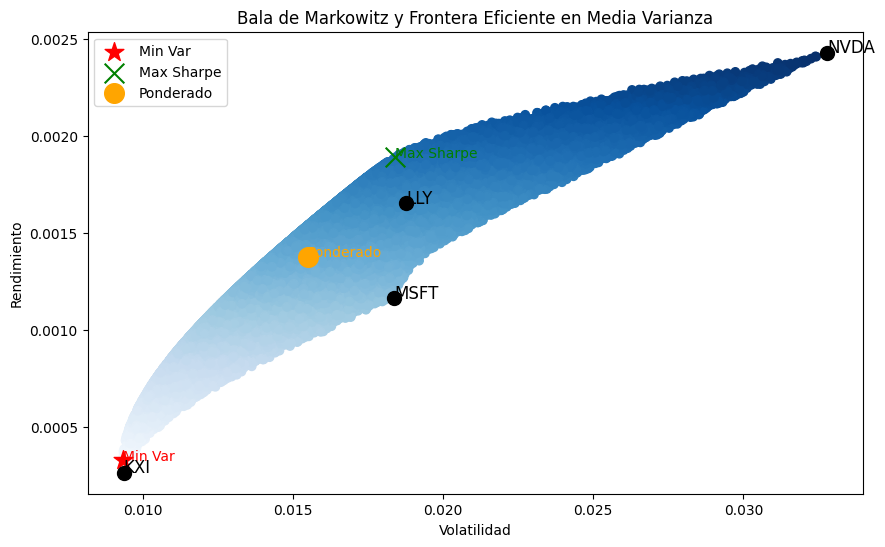

In [ ]:
# Realizar grafica
plt.figure(figsize=(10,6))
# Scatter plot de portafolios aleatorios
plt.scatter(vol_aleatorios, rend_aleatorios,c= rend_aleatorios,cmap= 'Blues')

# Scatter plot de Minima Varianza
plt.scatter(vol_minvar, red_minvar, marker='*', color='red', s=200, label='Min Var')

plt.text(vol_minvar, red_minvar, 'Min Var', fontsize=10, color = 'red')

# Scatter plot de Maximo de Sharpe
plt.scatter(vol, rend_max_sharpe, marker='x', color='green', s=200, label='Max Sharpe')
plt.text(vol, rend_max_sharpe, 'Max Sharpe', fontsize=10, color = 'green')

# Scatter plot de portafolio igual ponderado
plt.scatter(vol_port, rend_port, marker='o', color='orange', s=200, label='Ponderado')
plt.text(vol_port, rend_port, 'Ponderado', fontsize=10, color='orange')

# Nombrar eje x, y, titulo
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.title('Bala de Markowitz y Frontera Eficiente en Media Varianza') 

# Graficar coordenadas de activos individuales
ind_rend = ret.mean()
ind_vol = ret.std()
print('Rendimientos:', ind_rend)
print('Volatilidad:', ind_vol)

for i in range(n):
    plt.scatter(ind_vol[i], ind_rend[i], marker='o', color='black', s=100)
    plt.text(ind_vol[i], ind_rend[i], prices.columns[i], fontsize=12, color='black')
    plt.legend()
    plt.grid()

plt.show()

---

### Conclusiones 

### 7. Conclusión

    
Compara las métricas de rendimiento y volatilidad de los tres portafolios: 
1. Portafolio de mínima varianza
2. Portafolio de máximo Sharpe
3. Portafolio equitativamente ponderado

Responde:

- ¿Cuál de estos portafolios es superior en términos de riesgo?    


- ¿Cuál de estos portafolios es superior en términos de riesgo y retorno?   


- Interpreta la frontera eficiente en base a la teoría vista en clase y responde: ¿Qué pasa con el portafolio *equally weighted*?¿Es óptimo?¿Por qué?  


- ¿Por qué un portafolio podría ser mejor que otro? ¿De qué depende que sea "mejor"?    


- Analiza las ponderaciones obtenidas por el método de mínima varianza y el de máximo de Sharpe para cada activo de manera individual, basándote en la descripción presentada en la primera sección de la tarea. ¿Qué factores explican que cada activo tenga una mayor o menor ponderación en uno de los métodos en comparación con el otro?


- Concluye acerca de las ventajas y desventajas de una estrategia cuantitativa de asignación de activos frente a una basada en "feeling" o intuición.